In [17]:
# imports
import commands
from IPython.display import display
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
# specify database name
dbname = "../data/2016.db"

# connect to the sqlite3 database
db = sqlite3.connect(dbname)
hdb = db.cursor()

In [5]:
# list tables
query = """SELECT name FROM sqlite_master WHERE type='table'"""
hdb.execute(query)
print(hdb.fetchall())

[(u'games',), (u'teams',), (u'stadiums',), (u'players',), (u'umpires',), (u'events',), (u'pitchfx',)]


In [7]:
# load pitchfx table to dataframe
pitches = pd.read_sql_query("select * from pitchfx",db)

In [43]:
pitches.head()

,game_id,pitch_num,at_bat,time,prev_event,description,outcome,pre_balls,post_balls,pre_strike,...,vz0,ax,ay,az,break_y,break_angle,break_length,spin_dir,spin_rate,pitch_type
0,446873,3,1,174937.0,0,Called Strike,S,0,0,0,...,-6.774,-21.292,35.401,-19.319,23.7,43.1,5.9,238.878,2564.835,SI
1,446873,4,1,174956.0,0,Called Strike,S,0,0,1,...,0.893,8.363,23.901,-37.697,23.8,-13.2,10.7,56.558,1210.643,KC
2,446873,5,1,175017.0,0,Ball,B,0,1,2,...,-7.056,-21.596,33.223,-16.390,23.8,46.2,5.3,233.837,2765.216,SI
3,446873,6,1,175038.0,0,Ball,B,1,2,2,...,-3.393,-23.325,31.120,-19.890,23.8,45.7,6.0,242.226,2727.998,SI
4,446873,7,1,175102.0,0,Foul,S,2,2,2,...,1.216,8.345,27.587,-35.252,23.7,-13.9,9.9,69.753,1055.504,KC


In [15]:
print [col for col in pitches.columns]

['game_id', 'pitch_num', 'at_bat', 'time', 'prev_event', 'description', 'outcome', 'pre_balls', 'post_balls', 'pre_strike', 'post_strike', 'start_speed', 'end_speed', 'sz_top', 'sz_bot', 'pfx_x', 'pfx_z', 'px', 'pz', 'x', 'y', 'x0', 'y0', 'z0', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'break_y', 'break_angle', 'break_length', 'spin_dir', 'spin_rate', 'pitch_type']


In [41]:
pitches.outcome.value_counts()

S    124645
B    100278
X     49451
Name: outcome, dtype: int64

In [40]:
pitches.description.value_counts()

Ball                         92206
Called Strike                46988
Foul                         45868
In play, out(s)              32064
Swinging Strike              25250
In play, no out              11217
In play, run(s)               6170
Ball In Dirt                  6110
Foul Tip                      2232
Swinging Strike (Blocked)     2192
Intent Ball                   1288
Foul (Runner Going)            979
Foul Bunt                      915
Hit By Pitch                   609
Missed Bunt                    220
Pitchout                        64
Automatic Ball                   1
Swinging Pitchout                1
Name: description, dtype: int64

From https://fastballs.wordpress.com/category/pitchfx-glossary/:
* px: the left/right distance, in feet, of the pitch from the middle of the plate as it crossed home plate. The PITCHf/x coordinate system is oriented to the catcher’s/umpire’s perspective, with distances to the right being positive and to the left being negative.
* pz: the height of the pitch in feet as it crossed the front of home plate.

Home plate is 17 inches wide.

In [44]:
pitches = pitches.dropna()

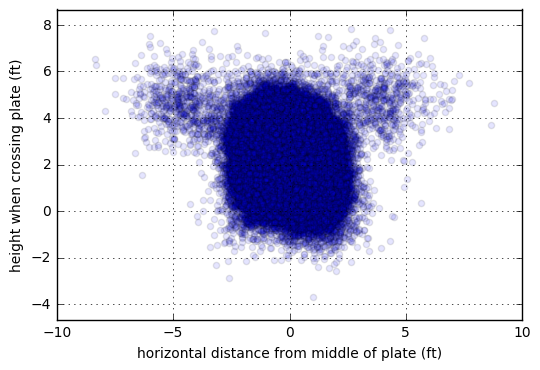

In [64]:
plt.scatter(pitches.px, pitches.pz, alpha=0.1)
plt.xlabel("horizontal distance from middle of plate (ft)")
plt.ylabel("height when crossing plate (ft)")
plt.axis("equal")
plt.grid()
plt.show()

In [65]:
anomalous = pitches[(pitches.px < -3) | (pitches.px > 3)]

In [77]:
print pitches.shape[0]
print anomalous.shape[0]
print float(anomalous.shape[0])/pitches.shape[0]*100

273820
1270
0.463808341246


In [71]:
print pitches.game_id.unique().shape[0]
print anomalous.game_id.unique().shape[0]

937
400


In [78]:
anomalous.description.value_counts()

Intent Ball        1050
Ball                145
Pitchout             30
Hit By Pitch         29
Ball In Dirt         11
Foul                  2
Missed Bunt           1
In play, run(s)       1
Called Strike         1
Name: description, dtype: int64

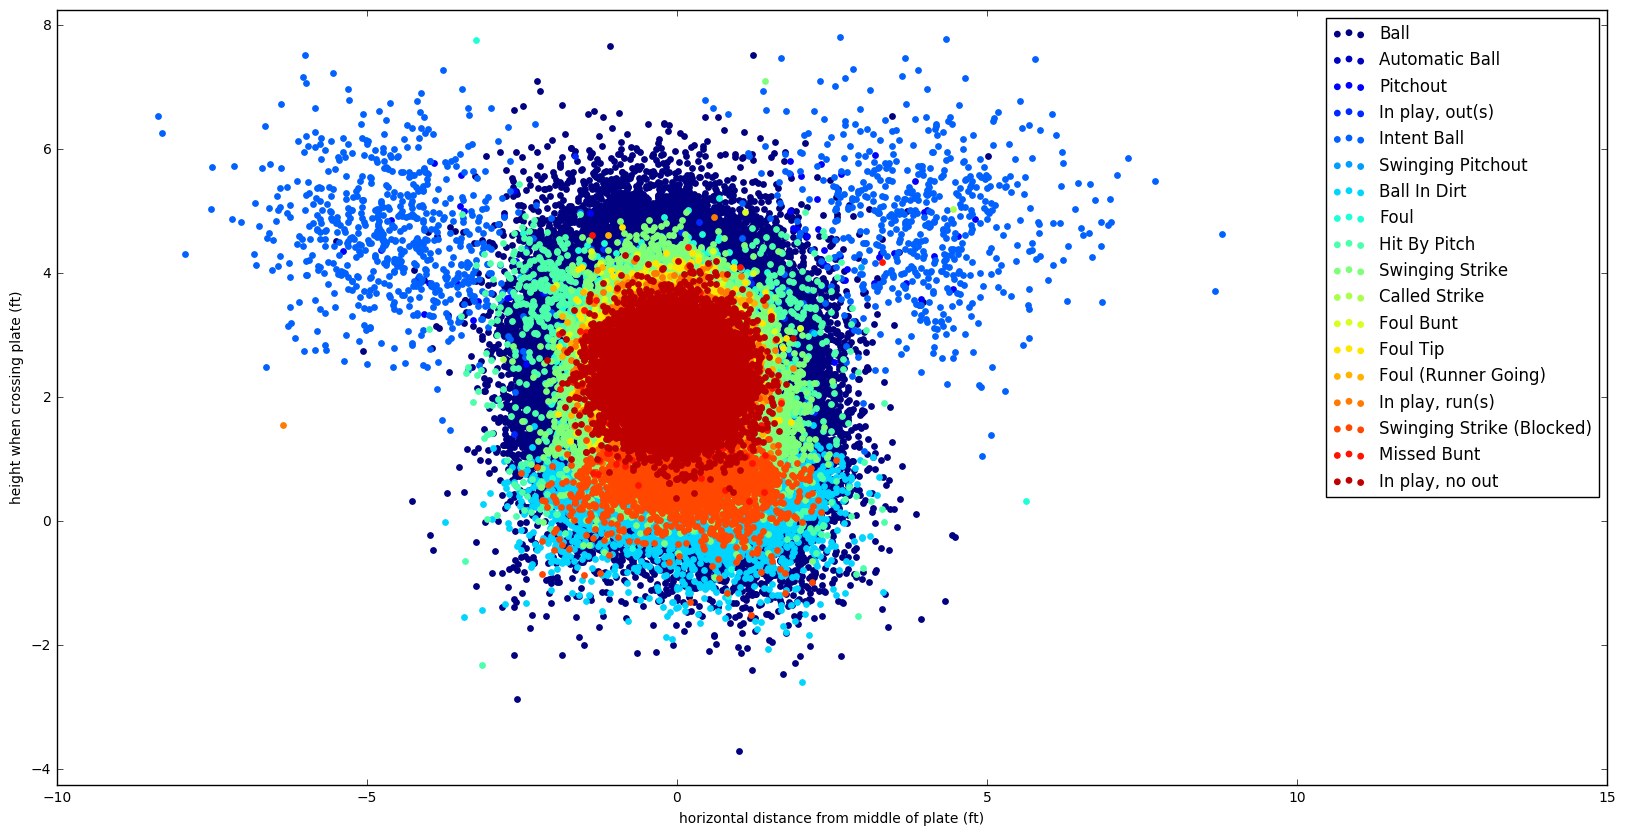

In [111]:
plt.figure(figsize=[20,10])

# Get unique names of description
uniq = list(set(pitches['description']))

# Set the color map to match the number of descriptions
z = range(1,len(uniq))
jet = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

# Plot for each description
for i in range(len(uniq)):
    indx = pitches['description'] == uniq[i]
    plt.scatter(pitches.px[indx], pitches.pz[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel("horizontal distance from middle of plate (ft)")
plt.ylabel("height when crossing plate (ft)")
plt.axis("equal")
plt.xlim(-10,15)
plt.legend(loc='upper right')
plt.show()


In [175]:
def plot_coords_desc(value):
    plt.scatter(pitches.px, pitches.pz, c='0.75', alpha=0.1, label="all")
    plt.scatter(pitches[pitches.description==value].px, pitches[pitches.description==value].pz, c='r', label=value, alpha=0.1)
    plt.xlabel("horizontal distance from middle of plate (ft)")
    plt.ylabel("height when crossing plate (ft)")
    plt.axis("equal")
    plt.grid()
    plt.legend(loc='lower right')
    plt.title(value)
    plt.show()

In [165]:
descriptions_sorted = pitches.description.value_counts().index

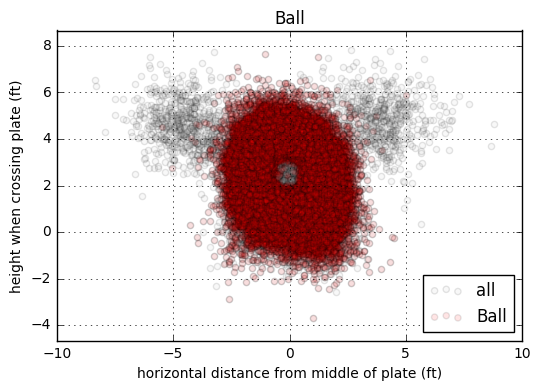

In [176]:
plot_coords_desc(descriptions_sorted[0])

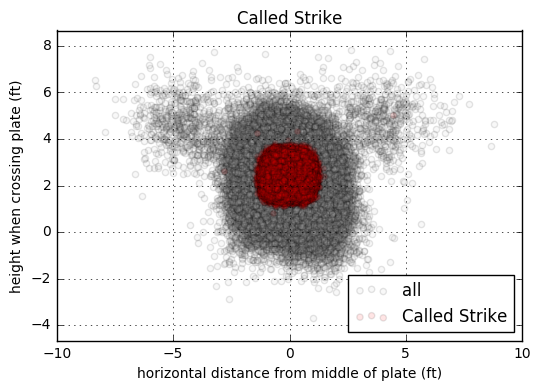

In [177]:
plot_coords_desc(descriptions_sorted[1])

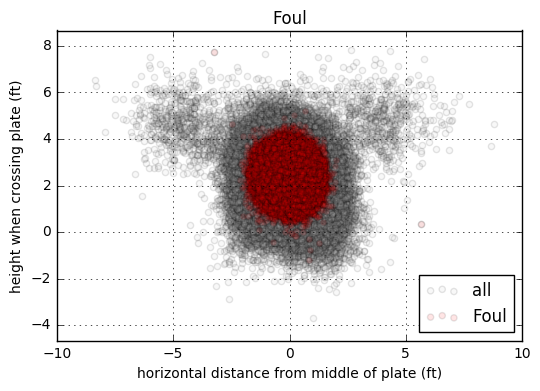

In [178]:
plot_coords_desc(descriptions_sorted[2])

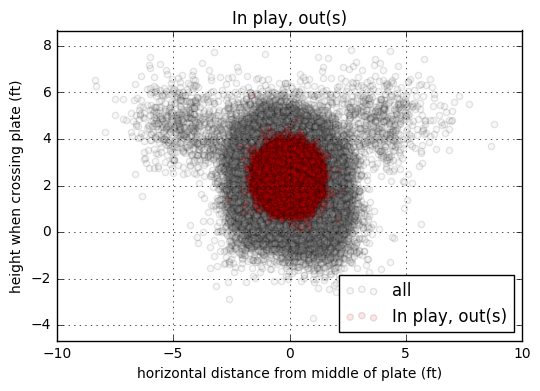

In [179]:
plot_coords_desc(descriptions_sorted[3])

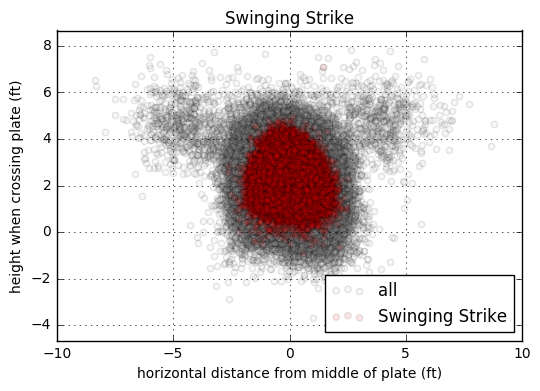

In [180]:
plot_coords_desc(descriptions_sorted[4])

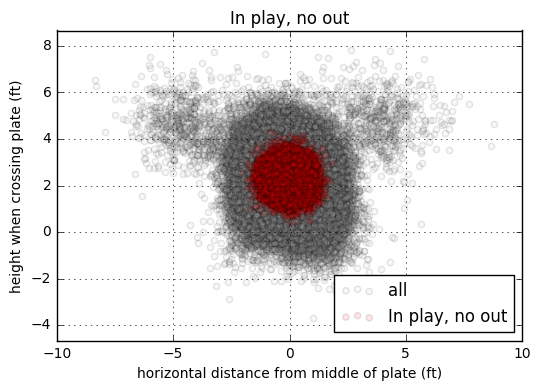

In [181]:
plot_coords_desc(descriptions_sorted[5])

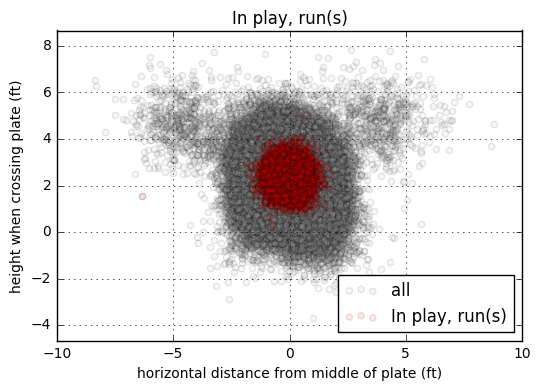

In [182]:
plot_coords_desc(descriptions_sorted[6])

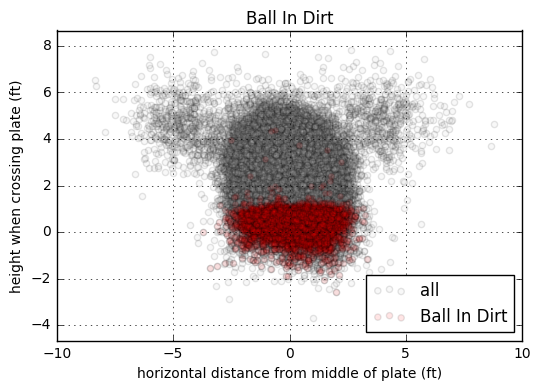

In [183]:
plot_coords_desc(descriptions_sorted[7])

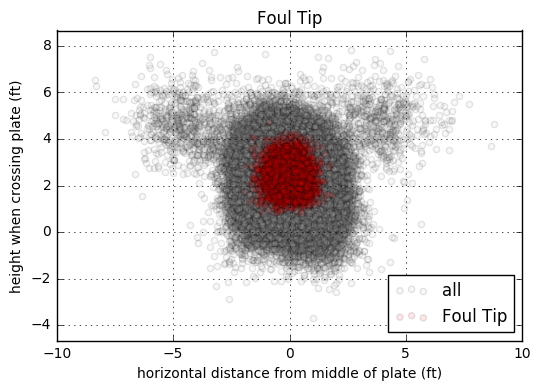

In [184]:
plot_coords_desc(descriptions_sorted[8])

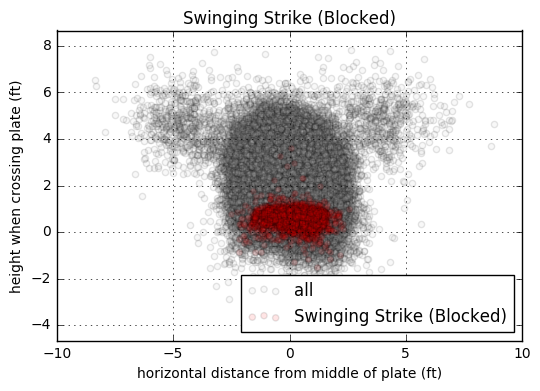

In [185]:
plot_coords_desc(descriptions_sorted[9])

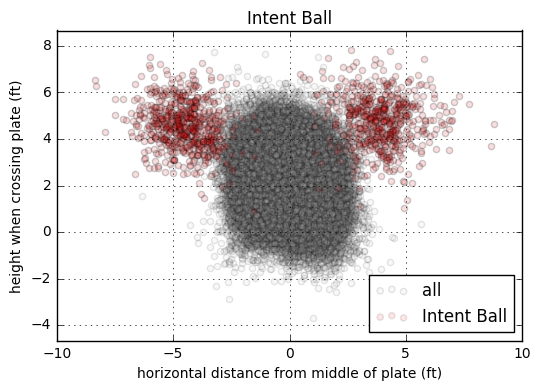

In [186]:
plot_coords_desc(descriptions_sorted[10])

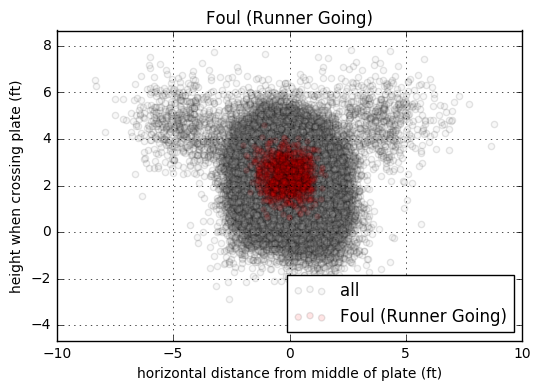

In [187]:
plot_coords_desc(descriptions_sorted[11])

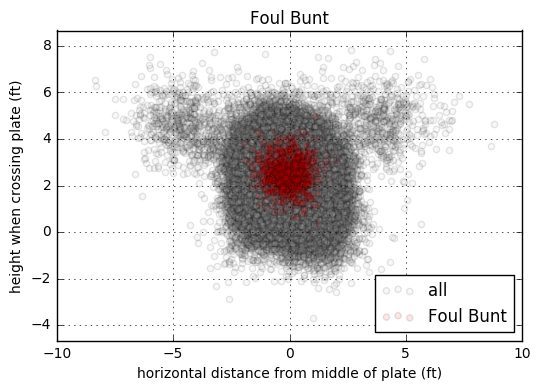

In [188]:
plot_coords_desc(descriptions_sorted[12])

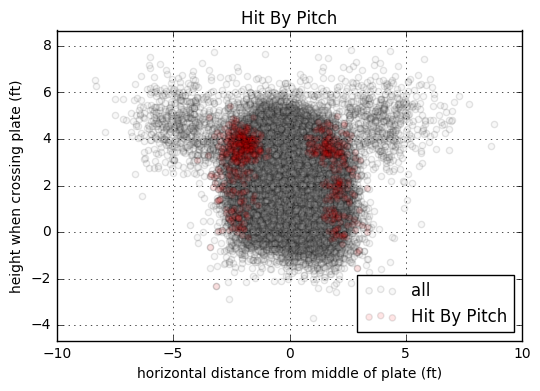

In [189]:
plot_coords_desc(descriptions_sorted[13])

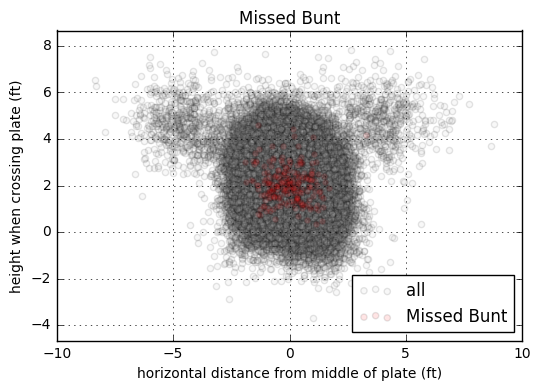

In [190]:
plot_coords_desc(descriptions_sorted[14])

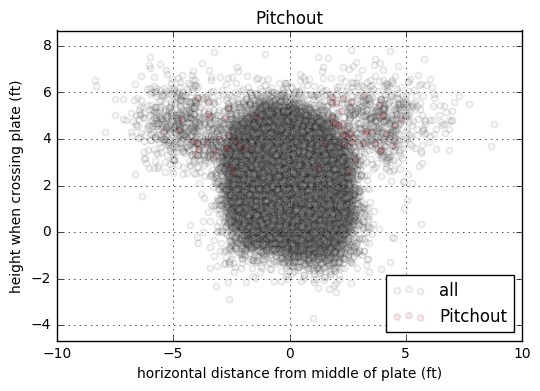

In [191]:
plot_coords_desc(descriptions_sorted[15])